In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from random import uniform
from sklearn.linear_model import Ridge, Lasso, LinearRegression

In [229]:
class RidgeRegression() :
      
    def __init__( self, learning_rate=0.01, iterations=1000, l2_penality=1 ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.array([-0.5 for i in range(self.n)])
        self.W_hist = [self.W]

        self.b = 0 
        self.b_hist = [self.b]
          
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()
            self.W_hist.append(self.W)
            self.b_hist.append(self.b)

        self.W_hist = np.array(self.W_hist)
        self.b_hist = np.array(self.b_hist)         

        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m
          
        # update weights    
        self.W = self.W - self.learning_rate * dW   
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b

In [230]:
class LassoRegression() :
      
    def __init__( self, learning_rate=0.01, iterations=1000, l1_penality=1 ) :
          
        self.learning_rate = learning_rate
          
        self.iterations = iterations
          
        self.l1_penality = l1_penality
          
    # Function for model training
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
          
        # weight initialization
          
        self.W = np.array([-0.5 for i in range(self.n)])
        self.W_hist = [self.W]
          
        self.b = 0
        self.b_hist = [self.b]
          
        self.X = X
          
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :
              
            self.update_weights()
            self.W_hist.append(self.W)
            self.b_hist.append(self.b)

        self.W_hist = np.array(self.W_hist)
        self.b_hist = np.array(self.b_hist)  
              
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
          
        # calculate gradients  
          
        dW = np.zeros( self.n )
          
        for j in range( self.n ) :
              
            if self.W[j] > 0 :
                  
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) 
                           
                         + self.l1_penality ) / self.m
          
            else :
                  
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) 
                           
                         - self.l1_penality ) / self.m
  
       
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights
      
        self.W = self.W - self.learning_rate * dW
      
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :
      
        return X.dot( self.W ) + self.b

In [215]:
df = pd.read_csv(r'./../ModelSelection/sin_noisy_80sample.csv')
X = df['x'].to_numpy()
y = df['y'].to_numpy()
y

array([ 0.0947    ,  0.08531593, -0.21781074, -0.21685252,  0.24112504,
       -0.2765976 , -0.43482938, -0.44738501, -0.89217936, -0.94949321,
       -0.87287928, -0.84062116, -1.02369268, -0.71621557, -0.60362408,
       -1.29165854, -0.48159965, -0.71885542, -0.58367206, -1.23873221,
       -1.14866364, -0.7738805 , -0.97740799, -0.46774489, -1.26497715,
       -1.1643947 , -0.37267189, -0.84235776, -0.8627683 , -1.00493981,
       -0.74940986, -1.22891742, -0.02755468, -0.58373518, -0.6660223 ,
       -0.63067129, -0.52123869, -0.39652238, -0.33990062, -0.20762702,
       -0.02663681,  0.25893599,  0.09586896,  0.34853302,  0.09352205,
        0.84258787, -0.18999172,  0.46850008,  0.63873617,  0.63731076,
        0.15175876,  0.57148573,  1.03948938,  0.53997018,  0.76875043,
        0.95712042,  0.9060707 ,  0.5476114 ,  1.17023034,  1.12904388,
        0.90677543,  0.75530822,  0.71373816,  1.04183637,  0.73126545,
        0.78796842,  0.30286472,  0.81111852,  0.48200523,  0.60

In [184]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.33, random_state = 0 )

In [185]:
ridge = RidgeRegression(l2_penality=0)
ridge.fit(X_train.reshape(-1, 1), y_train)

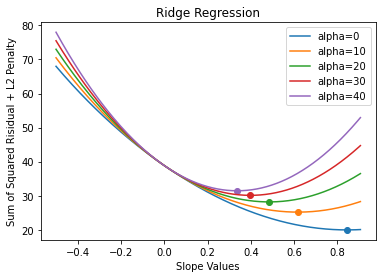

In [157]:
alpha = [0, 10, 20, 30, 40]
slope = ridge.W_hist
intercept = ridge.b_hist
for al in alpha:
    rss = np.array([np.sum(((X.reshape(-1, 1).dot(slope[i]) + intercept[i]) - y) ** 2) + al * slope[i] ** 2 for i in range(slope.shape[0])])
    plt.plot(slope, rss, label=f"alpha={al}")
    index = np.where(rss == min(rss))
    plt.scatter(slope[index[0]], rss[index[0]])
    plt.legend()
plt.xlabel("Slope Values")
plt.ylabel("Sum of Squared Risidual + L2 Penalty")
plt.title("Ridge Regression")
plt.savefig(r'./plot/ridge_alpha.jpg')

In [150]:
lasso = LassoRegression(l1_penality=0)
lasso.fit(X_train.reshape(-1, 1), y_train)

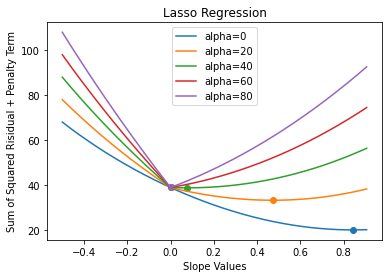

In [151]:
slope = lasso.W_hist
intercept = lasso.b_hist
alpha = [0, 20, 40, 60, 80]
for al in alpha:
    rss = np.array([np.sum(((X.reshape(-1, 1).dot(slope[i]) + intercept[i]) - y) ** 2) + al * abs(slope[i]) for i in range(slope.shape[0])])
    plt.plot(slope, rss, label=f"alpha={al}")
    index = np.where(rss == min(rss))
    plt.scatter(slope[index[0]], rss[index[0]])
    plt.legend()
plt.xlabel("Slope Values")
plt.ylabel("Sum of Squared Risidual + Penalty Term")
plt.title("Lasso Regression")
plt.savefig(r'./plot/lasso_alpha.jpg')

In [158]:
def target_func(x):
    return np.sin(np.pi * x)

In [168]:
def random(period, data_point, size):
    return np.array([[[uniform(min(period), max(period))] for i in range(data_point)] for j in range(size)])

In [330]:
x = random([-1, 1], 2, 10000)
y = []
for i in x:
    temp = []
    for j in i:
        for k in j:
            temp_y = target_func(k)
            temp.append(temp_y)
    y.append(temp)
y = np.array(y)

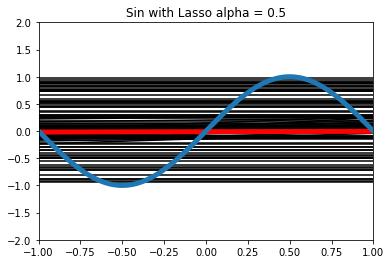

In [351]:
x_lin = np.linspace(-1, 1, 1000)
y_total = []
for i in range(x.shape[0]):
    ridge = Lasso(alpha=0.5).fit(x[i], y[i])
    y_pred = ridge.predict(x_lin.reshape(-1, 1))
    y_total.append(y_pred)
    if i < 100:
        plt.plot(x_lin, y_pred, c='k')
y_total = np.array(y_total)
y_mean = np.mean(y_total, axis=0)
avg_model = LinearRegression().fit(x_lin.reshape(-1, 1), y_mean)
y_mean_pred = avg_model.predict(x_lin.reshape(-1, 1))
plt.plot(x_lin, y_mean, linewidth=5, c='r')
plt.plot(x_lin, target_func(x_lin), linewidth=5)
plt.xlim(-1, 1)
plt.ylim(-2, 2)
plt.title("Sin with Lasso alpha = 0.5")
plt.savefig(r'./plot/sin_lasso2.jpg')

In [352]:
bias = np.round(np.mean((y_mean_pred - target_func(x_lin)) ** 2), 2)
var = []
for y_pred in y_total:
    var.append(np.mean((y_pred - y_mean_pred)**2))
var = np.array(var)
variance = np.round(np.mean(var), 2)
print("Lasso")
print("Bias: %.2f" % bias)
print("Variance: %.2f" % variance)
print("E_out: %.2f" % (bias + variance))

Lasso
Bias: 0.50
Variance: 0.25
E_out: 0.75


In [313]:
y_total[0].shape

(1000,)

1.5859310293711775
